<a href="https://colab.research.google.com/github/rafaelfabri/Gestao_de_Projetos/blob/main/An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise das Reclamações de Clientes de uma Concecionária de Energia**

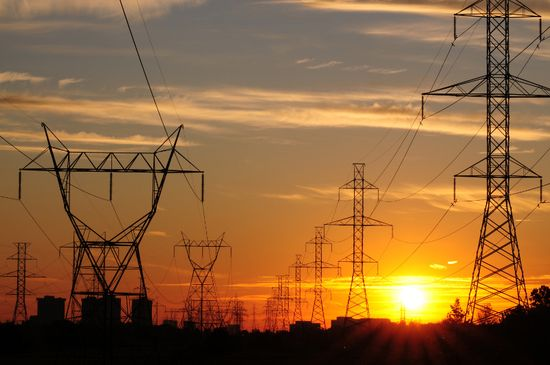

## **Resumo**

Esse projeto realizado no *Google Colaboratory* em Linguagem de Programação *Pyhton* visa mostrar como será realizada a análise exploratória de dados por parte da empresa de consultoria. 

Para isso foi utilizada uma base de dados reais sobre reclamações de clientes de uma concessionária de energia localizada no estado de São Paulo.

O objetivo desse relatório é mostrar como será realizada a análise exploratória de um cliente da consultora, como também identificar oportunidades, causas e problemas em relação as reclamações de clientes da conceccionária.



*Obs*: Vale ressaltar que esse relatório é um dos entregáveis da consultoria, porém a apresentação de resultados é realizado por meio de uma apresentação em Power Point através dos resultados obtidos nessa documentação.

## **Sumário** 

* 1 Importando Base de dados e Bibliotecas;
* 2 Entendimento e Problemas em Relação a Base de Dados;
* 3 Análise Exploratória e Entendimento do Cenário da Empresa;
  * 3.1. Quantidade de Reclamações Atendidas Dentro do Prazo e Fora Prazo;
  * 3.2. Histograma e Boxplot do tempo em dias para o atendimento de uma Reclamação;
  * 3.3. Quantidade de Reclamações por Gerência Executiva;
  * 3.4. Gráfico de Pareto para Verificação dos Maiores tipos de Reclamações;
  * 3.5. Quais gerências são responsáveis pela reclamação de maior frequência;
* 4 Conclusão.

In [ ]:
#@title
def x_ticks(minimo, maximo, intervalo, ax, tam):
  ax.set_xticklabels(labels = np.arange(minimo, maximo, intervalo), fontdict={'fontsize':tam})
  ax.set_xticks(np.arange(minimo, maximo, intervalo))

def remocao_eixos(lista, ax):
  for axis in lista:
    ax.spines[axis].set_color(None)

def y_ticks(min, max, step, size, ax):
  ax.set_yticks(np.arange(min, max, step))
  ax.set_yticklabels(labels = np.arange(min, max, step), fontdict = {'fontsize' : size})

def legenda_aux(x, y, s , size, ax, vertical, horizontal):
  for i in range(0, len(y), 1):
    ax.text(x = x[i] + horizontal, y = y[i] + vertical, s = str(int(s[i])), size = size)

## **1. Importando Base de dados e Bibliotecas** 

In [ ]:
#importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#caminho da base de dados
data = '/content/drive/MyDrive/Notebook/Vida Acadêmica/Engenharia de Produção/8 semestre/Gestão de Projetos/trabalho/Base completa/base_jan_nov.csv'

#atribuindo a base de dados como um DataFrame a variavel df
df = pd.read_csv(data)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (26,27,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## **2. Entendimento e Problemas em Relação a Base de Dados** 



> `Essa etapa será avaliado a base da empresa em que estamos realizando a consultoria e estudo em relação as reclamações.`



> `Como não se sabe quais são as informações presentes na base é avaliado algumas informações, por exemplo:`

* Dados ausentes
* Base contém apenas reclamações?
* Colunas desnecessárias para análise, etc.

Abaixo será verificado o tamanho do conjunto de dados e as 5 primeiras linhas.

In [ ]:
#Verificando o tamanho da base de dados
print('Qtd de linhas da base', df.shape[0])
print('Qtd de colunas da base', df.shape[1])

Qtd de linhas da base 728392
Qtd de colunas da base 32


In [ ]:
#5 primeiras linhas 
df.head()

,Ref_MesAno,Gerencia Executiva2,Gerencia2,Supervisão,Cod_Wrkflw,Area_WRKFLW,Cod_Local,Localidade,COD_UN_CONS_COS,NUM_SEQ_OPER_SSE,Seq_OS,Tipo_SS,Des_Tipo_SS,COD_SITU_SSE,DTA_CMPT_ORIG_SSE,Tipo_OS,Des_Sub_Tipo_Os,COD_SITU_COS,Dta_Sit_Cos,Dta_Progm_Cos2,Dta_Concl_Cos,Dta_Lim_Resp2,StatusPrazo_Concl2,Tipo_Concl,Tático,TipologiaAnexo_III,Filtro_Ferramenta,Filtro2_Ferramenta,Área_Anexo_III,Tipo_OS_Anexo_III,Processo_IEC,Tipo_Local UB_RR
0,01/2021,NaN,NaN,NaN,1004,FISCALIZACAO FATURAMENTO,280,Peruíbe,39681874.0,20215938286736,1,SR/RCL,RECLAMACAO DO CLIENTE,BX,11/01/2021,SR/R20,RCL - SERVICOS FORA DO PRAZO,CO,15/01/2021,11/01/2021,15/01/2021,18/01/2021,DENTRO DO PRAZO,IMPROCEDENTE,Solução da Demanda Regulada,"Solução de reclamação, caso geral",NaN,NaN,Gestão da Satisfação,RCL - SERVICOS FORA DO PRAZO-EM ANDAMENTO,(Acompanhamento),NaN
1,01/2021,Área Técnica,Desempenho da Operação,Desempenho da Operação,529,DESEMPENHO DA OPERAÇÃO A2 - A3,330,Miracatu,40751210.0,20215954419662,1,SR/RCL,RECLAMACAO DO CLIENTE,BX,15/01/2021,SR/R61,RCL - QUALIDADE DE FORNECIMENTO,CO,21/01/2021,15/01/2021,21/01/2021,22/01/2021,DENTRO DO PRAZO,PROCEDENTE,Solução da Demanda Regulada,"Solução de reclamação, caso geral",NaN,NaN,Gestão da Satisfação,RCL - FALTA DE ENERGIA,FORNECIMENTO,NaN
2,01/2021,Área Técnica,Desempenho da Operação,Desempenho da Operação,529,DESEMPENHO DA OPERAÇÃO A2 - A3,71,Cordeirópolis,28315995.0,20215954906132,1,SR/RCL,RECLAMACAO DO CLIENTE,BX,15/01/2021,SR/R61,RCL - QUALIDADE DE FORNECIMENTO,CO,21/01/2021,15/01/2021,21/01/2021,22/01/2021,DENTRO DO PRAZO,PROCEDENTE,Solução da Demanda Regulada,"Solução de reclamação, caso geral",NaN,NaN,Gestão da Satisfação,RCL - FALTA DE ENERGIA,FORNECIMENTO,NaN
3,01/2021,Área Técnica,Desempenho da Operação,Desempenho da Operação,529,DESEMPENHO DA OPERAÇÃO A2 - A3,121,Jarinu,16675878.0,20215949849666,1,SR/RCL,RECLAMACAO DO CLIENTE,BX,14/01/2021,SR/R61,RCL - QUALIDADE DE FORNECIMENTO,CO,21/01/2021,14/01/2021,21/01/2021,21/01/2021,DENTRO DO PRAZO,PROCEDENTE,Solução da Demanda Regulada,"Solução de reclamação, caso geral",NaN,NaN,Gestão da Satisfação,RCL - FALTA DE ENERGIA,FORNECIMENTO,NaN
4,01/2021,Área Técnica,Desempenho da Operação,Desempenho da Operação,529,DESEMPENHO DA OPERAÇÃO A2 - A3,123,Atibaia,35209526.0,20215961741880,1,SR/RCL,RECLAMACAO DO CLIENTE,BX,19/01/2021,SR/R61,RCL - QUALIDADE DE FORNECIMENTO,CO,26/01/2021,19/01/2021,26/01/2021,26/01/2021,DENTRO DO PRAZO,PROCEDENTE,Solução da Demanda Regulada,"Solução de reclamação, caso geral",NaN,NaN,Gestão da Satisfação,RCL - FALTA DE ENERGIA,FORNECIMENTO,NaN


Olhando todas as colunas, nota-se que a coluna *Des_Tipo_SS* apresenta aguma informação sobre tipo de serviço. As 5 primeiras linhas são representadas por reclamações de clientes.

Dessa forma é importante avaliar quais são as observações presentes na coluna *Des_Tipo_SS* para isso foi utilizada a célula abaixo.

In [ ]:
#Tipos de serviços que estão na coluna Des_Tipo_SS
df['Des_Tipo_SS'].unique()

array(['RECLAMACAO DO CLIENTE', 'ALTERACAO DE CARGA',
       'ILUMINACAO PUBLICA', 'REDE DE DISTRIBUICAO URBANO E RURAL',
       'COMPARTILHAMENTO DE REDE DE DISTRIBUICAO',
       'LIGACAO DE UNIDADE CONSUMIDORA', 'MEDICAO AGRUPADA',
       'REMOCAO DE REDE DE DISTRIBUICAO', 'SOLICITACAO DO CLIENTE',
       'CADASTRO DE UC OPTANTE MICRO / MINI GERADOR',
       'REMOCAO/AFASTAMENTO/PROTECAO DE REDE',
       'PEDIDO DE LIGACAO CLIENTE EXISTE/UC NOVA',
       'TROCA DE PADRAO DA UC', 'PEDIDO DE LIGACAO CLIENTE E UC NOVOS',
       'PEDIDO DE LIGACAO UC CADASTRADA/MESMO CLIENTE',
       'PEDIDO DE LIGACAO CLIENTE NOVO/UC EXISTE',
       'PEDIDO DE LIGACAO CLIENTE/UC CADASTRADOS',
       'RELIGACAO IMEDIATA DE UC', 'MISCELANEA',
       'DESLIGAMENTO DE UNIDADE CONSUMIDORA', 'ADESAO A TARIFA BRANCA',
       'AFERICAO DE EQUIPAMENTO',
       'RESSARCIMENTO DE DANOS EM EQUIPAMENTOS ELETRICOS'], dtype=object)

Nota-se que há vários tipos de observações não apenas Reclamação de Cliente.

Entrando em contato com o cliente, que é a concecionária de energia, confirmou que a base utilizada possui todas as OS (Ordem de Serviços) solicitados por clientes, dentre essas ordens há serviços de ligação de cliente, pedido de desligamento, troca de medidor entre outros.

Assim, devemos realizar o filtro dessa coluna para fazermos uma análise apenas em relação as reclamações. 

In [ ]:
#Filtrando apenas reclamações de cliente
df_rcl = df[df['Des_Tipo_SS']=='RECLAMACAO DO CLIENTE'].copy()

Na coluna *Des_Tipo_SS* foi filtrado apenas o tipo de Reclamação de Cliente, essa coluna mostra cada tipo de solicitação de serviço.

Na coluna *Des_Sub_Tipo_Os* está representado com maior detalhes qual foi a solicitação, por exemplo em caso de reclamações qual tipo de reclamação:

* RCL - SERVICOS FORA DO PRAZO
* RCL - LEITURA 
* RCL - QUALIDADE DE FORNECIMENTO

Abaixo é verificado todos os tipos de reclamações presentes na base.

In [ ]:
df_rcl['Des_Sub_Tipo_Os'].unique()

array(['RCL - SERVICOS FORA DO PRAZO', 'RCL - QUALIDADE DE FORNECIMENTO',
       'RCL - SERVICO NAO SOLICITADO PELO TITULAR',
       'RCL - PROJETOS/ORÇAMENTO DE OBRAS',
       'RCL - AVISO DE DESLIGAMENTO PROGRAMADO',
       'RCL - QUALIDADE DA ENERGIA/NIVEL',
       'RCL - SERVICO DE CAMPO MAL EXECUTADO',
       'RCL - EMPRETEIRA- POSTURA/PROC AGENTE - ENERGEC',
       'RCL - ARRECADAÇÃO', 'RCL - MULTA/JUROS',
       'RCL - PROBLEMAS COM ENTREGA DE CONTAS - LES', 'RCL - FATURAS',
       'RCL - LEITURA',
       'RCL - RETIRADA DE RESIDUOS DEIXADOS-PODA DE ARVORE',
       'RCL - QUALIDADE DA PODA DE ARVORE', 'RCL - ATENDIMENTO',
       'RCL - PROCEDIMENTO IRREGULAR', 'RCL - CONSUMO',
       'RCL - CADASTRO / ALTERAÇÃO CADASTRAL',
       'RCL - FENOMENOS TRANSITORIOS OU PERMANENTE PRODUTO',
       'RCL - NEGATIVAÇÃO/DEBITOS/ACOES COBRANCA',
       'RCL - PROBLEM C/ ENTREGA DE CONTAS - CORREIO/EMAIL',
       'RCL - ALTERACAO DATA DE VENCIMENTO',
       'RCL - DANOS EQUIPAMENTOS ELETRICOS

Agora com a base filtrada podemos ver a quantidade de reclamações durante o ano de 2021 de janeiro até novembro.

In [ ]:
#tamanho da base de dados
print('Qtd de reclamações:', df_rcl.shape[0])

Qtd de reclamações: 51905


Abaixo está uma avaliação da quantidade de dados ausentes.

In [ ]:
#Verificadno qtd de dados ausentes em cada coluna
(df_rcl.isnull().sum() / df_rcl.shape[0]).sort_values(ascending = False)

Filtro2_Ferramenta     1.000000
Filtro_Ferramenta      0.999576
Tipo_Local UB_RR       0.625990
TipologiaAnexo_III     0.012927
COD_UN_CONS_COS        0.001310
Supervisão             0.000039
Gerencia2              0.000039
Gerencia Executiva2    0.000039
Localidade             0.000019
Processo_IEC           0.000000
Tipo_OS_Anexo_III      0.000000
Área_Anexo_III         0.000000
Dta_Progm_Cos2         0.000000
Tático                 0.000000
Tipo_Concl             0.000000
StatusPrazo_Concl2     0.000000
Dta_Lim_Resp2          0.000000
Dta_Concl_Cos          0.000000
Ref_MesAno             0.000000
Dta_Sit_Cos            0.000000
COD_SITU_COS           0.000000
Tipo_OS                0.000000
DTA_CMPT_ORIG_SSE      0.000000
COD_SITU_SSE           0.000000
Des_Tipo_SS            0.000000
Tipo_SS                0.000000
Seq_OS                 0.000000
NUM_SEQ_OPER_SSE       0.000000
Cod_Local              0.000000
Area_WRKFLW            0.000000
Cod_Wrkflw             0.000000
Des_Sub_

A partir dessa análise preliminar, confirmação de informações e interesse do cliente, decidiu por se excluir as colunas abaixo, pois nao agregariam ao estudo.

In [ ]:
#apagando algumas colunas
df_rcl.drop(labels = ['Cod_Wrkflw', 'Cod_Local', 'Tipo_SS', 
                      'Des_Tipo_SS', 'COD_SITU_SSE', 'Tipo_OS', 
                      'Filtro_Ferramenta', 'Filtro2_Ferramenta', 
                      'TipologiaAnexo_III','Tático', 'COD_SITU_COS',
                      'Ref_MesAno', 'Tipo_Local UB_RR', 'Área_Anexo_III', 
                      'Processo_IEC', 'Tipo_OS_Anexo_III', 'Seq_OS'], axis = 1, inplace =  True)

Agora olharemos melhor as colunas que representam uma data para entender o que variável informa.

In [ ]:
df_rcl.head(3)

,Gerencia Executiva2,Gerencia2,Supervisão,Area_WRKFLW,Localidade,COD_UN_CONS_COS,NUM_SEQ_OPER_SSE,DTA_CMPT_ORIG_SSE,Des_Sub_Tipo_Os,Dta_Sit_Cos,Dta_Progm_Cos2,Dta_Concl_Cos,Dta_Lim_Resp2,StatusPrazo_Concl2,Tipo_Concl
0,NaN,NaN,NaN,FISCALIZACAO FATURAMENTO,Peruíbe,39681874.0,20215938286736,11/01/2021,RCL - SERVICOS FORA DO PRAZO,15/01/2021,11/01/2021,15/01/2021,18/01/2021,DENTRO DO PRAZO,IMPROCEDENTE
1,Área Técnica,Desempenho da Operação,Desempenho da Operação,DESEMPENHO DA OPERAÇÃO A2 - A3,Miracatu,40751210.0,20215954419662,15/01/2021,RCL - QUALIDADE DE FORNECIMENTO,21/01/2021,15/01/2021,21/01/2021,22/01/2021,DENTRO DO PRAZO,PROCEDENTE
2,Área Técnica,Desempenho da Operação,Desempenho da Operação,DESEMPENHO DA OPERAÇÃO A2 - A3,Cordeirópolis,28315995.0,20215954906132,15/01/2021,RCL - QUALIDADE DE FORNECIMENTO,21/01/2021,15/01/2021,21/01/2021,22/01/2021,DENTRO DO PRAZO,PROCEDENTE


Verificando sobre as datas:

* *DTA_CMPT_ORIG_SSE*: Data da origem do serviço
* *Dta_Sit_Cos*: Data programada que será atendido o cliente
* *Dta_Progm_Cos2*: O dia que foi recebido pelo Callback a reclamação e se ele já fez a programação no mesmo momento
* *Dta_Concl_Cos*: Data da conclusão do serviço (do atendimento)
* *Dta_Lim_Resp2*: Data limite para atendimento da reclamação

A partir de uma análise notou-se que não há diferença entre a data de origem do serviço, quando o cliente faz a reclamação da data Dta_Progm_Cos2 quando foi programada.
Logo, no mesmo dia que é feita a reclamação já é programada a verificação da reclamação.

Também, notou-se que não é necessário uma análise na coluna Dta_Sit_Cos, pois não é importante para quando foi programada a execução, mas sim o dia que realmente ocorreu a execução.

Assim, as colunas 'Dta_Sit_Cos' e 'Dta_Progm_Cos2' serão excluídas do conjunto. 


In [ ]:
df_rcl.drop(labels = ['Dta_Sit_Cos', 'Dta_Progm_Cos2'], axis = 1, inplace = True)

In [ ]:
#Mudando as colunas DTA_CMPT_ORIG_SSE e Dta_Concl_Cos para de tipo texto para tipo datetime
df_rcl['DTA_CMPT_ORIG_SSE'] = pd.to_datetime(df_rcl['DTA_CMPT_ORIG_SSE'], format = "%d/%m/%Y")
df_rcl['Dta_Concl_Cos'] = pd.to_datetime(df_rcl['Dta_Concl_Cos'], format = "%d/%m/%Y")

Com isso a análise preliminar e a transformação da base de dados para uma simplificação da análise exploratória está finalizada.

## **3. Análise Exploratória e Entendimento do Cenário da Empresa**

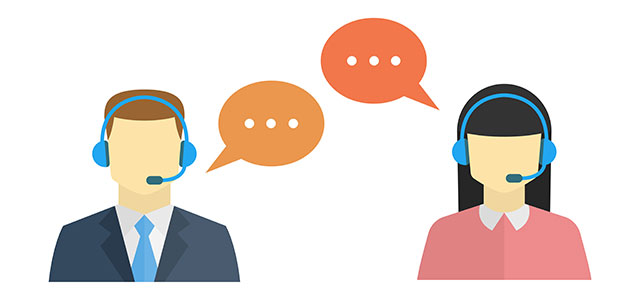

In [ ]:
df_rcl.head(3)

,Gerencia Executiva2,Gerencia2,Supervisão,Area_WRKFLW,Localidade,COD_UN_CONS_COS,NUM_SEQ_OPER_SSE,DTA_CMPT_ORIG_SSE,Des_Sub_Tipo_Os,Dta_Concl_Cos,Dta_Lim_Resp2,StatusPrazo_Concl2,Tipo_Concl
0,NaN,NaN,NaN,FISCALIZACAO FATURAMENTO,Peruíbe,39681874.0,20215938286736,2021-01-11,RCL - SERVICOS FORA DO PRAZO,2021-01-15,18/01/2021,DENTRO DO PRAZO,IMPROCEDENTE
1,Área Técnica,Desempenho da Operação,Desempenho da Operação,DESEMPENHO DA OPERAÇÃO A2 - A3,Miracatu,40751210.0,20215954419662,2021-01-15,RCL - QUALIDADE DE FORNECIMENTO,2021-01-21,22/01/2021,DENTRO DO PRAZO,PROCEDENTE
2,Área Técnica,Desempenho da Operação,Desempenho da Operação,DESEMPENHO DA OPERAÇÃO A2 - A3,Cordeirópolis,28315995.0,20215954906132,2021-01-15,RCL - QUALIDADE DE FORNECIMENTO,2021-01-21,22/01/2021,DENTRO DO PRAZO,PROCEDENTE


###Significado de cada coluna:

* Gerencia Executiva2: Gerência Executiva/Superintendência() da empresa responsável pela a reclamação;
* Gerencia2: Gerência/departamento responsável pela reclamação;
* Supervisão: Supervisão dentro da Gerência resposnável pela reclamação;
* Area_WRKFLW: Área responsável;
* Localidade: Localidade da reclamação do cliente;
* COD_UN_CONS_COS: Código do cliente;
* NUM_SEQ_OPER_SSE: Número da ordem de serviço(protocólo) realizado;
* DTA_CMPT_ORIG_SSE*: Data da origem do serviço
* Dta_Concl_Cos*: Data da conclusão do serviço (do atendimento)
* Dta_Lim_Resp2*: Data limite para atendimento da reclamação
* StatusPrazo_Concl2: Status da conclusão (Dentro do Prazo, Fora do Prazo)
* Tipo_Concl: A reclamação do cliente foi Procedente(cliente tinha razão) ou Improcedente(cliente não tinha razão)

A análise exploratória será simples e direta, não serão levantados muitos pontos, porém é introduzido uma forma inicial de como é realizado a análise exploratória da consultoria.

As análises realizadas foram:
* 3.1. Quantidade de Reclamações Atendidas dentro do Prazo e Fora Prazo;
* 3.2. Histograma e Boxplot do tempo em dias para o atendimento de uma Reclamação;
* 3.3. Quantidade de Reclamações por Gerência Executiva;
* 3.4. Gráfico de Pareto para Verificação dos Maiores tipos de Reclamações;
* 3.5. Quais gerências são responsáveis pela reclamação de maior frequência.

### **3.1. Quantidade de Reclamações Atendidas dentro do Prazo e Fora Prazo**

Abaixo pode ser visualiado o gráfico que mostra a quantidade de reclamações que foram atendidas dentro do prazo e fora do prazo.

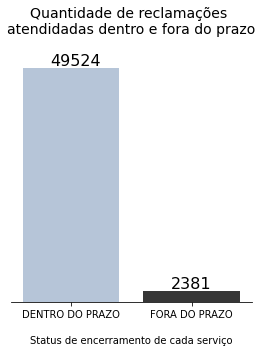

In [ ]:
fig, ax = plt.subplots(figsize = (4, 5))

sns.countplot(x = df_rcl['StatusPrazo_Concl2'], ax = ax, palette = ['#B0C4DE' ,'#363636'])

x = [0,1]
y = df_rcl['StatusPrazo_Concl2'].value_counts()

legenda_aux(x, y, y, 16, ax, 500, -0.17);

remocao_eixos(['top', 'left', 'right'], ax)

ax.tick_params(labelleft = None, left = None)

ax.set_title('Quantidade de reclamações \natendidadas dentro e fora do prazo\n', fontdict = {'fontsize' : 14})
ax.set_ylabel('')
ax.set_xlabel('\nStatus de encerramento de cada serviço')

fig.tight_layout();

Nota-se que 49.524 reclamações foram atendidas dentro do prazo, porém 2.381 reclamações foram atendidas fora prazo.

Essas 2.381 reclamações representam 4,8% de todo o conjunto, sendo um valor significativo de clientes atendidos após o tempo limite de atendimento. Para uma verificação melhor desse resultado, deve-se fazer um Benchmarking para verificar qual é o nível das outras empresas do mesmo setor.

No entanto, se olharmos para cultura de Foco no Cliente, pode-se presumir que a empresa desapontou um total de 51.905 clientes e 2.381 desses tiveram um atraso em suas respostas, provavelmente ficando mais decepcionado.

### **3.2. Histograma e Boxplot do tempo em dias para o atendimento de uma Reclamação**

Abaixo é realizado um histograma e um boxplot.

Observa-se que o tempo de atendimento das reclamações segue aproximadamente uma distribuição exponencial, a maioria das reclamações sendo atendidas nos primeiros dias após o contato do cliente com a empresa. Até o dia 18 observa-se uma significativa quantidade de reclamações.

Outro ponto importante que é possível notar, é a presença de bastante Outliers, que estão todos após o tempo de atendimento de 18 dias, a reclamação mais discrepante foi atendida com mais de 300 dias. A partir disso nota-se uma certa falta de prioridade da empresa com alguns clientes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


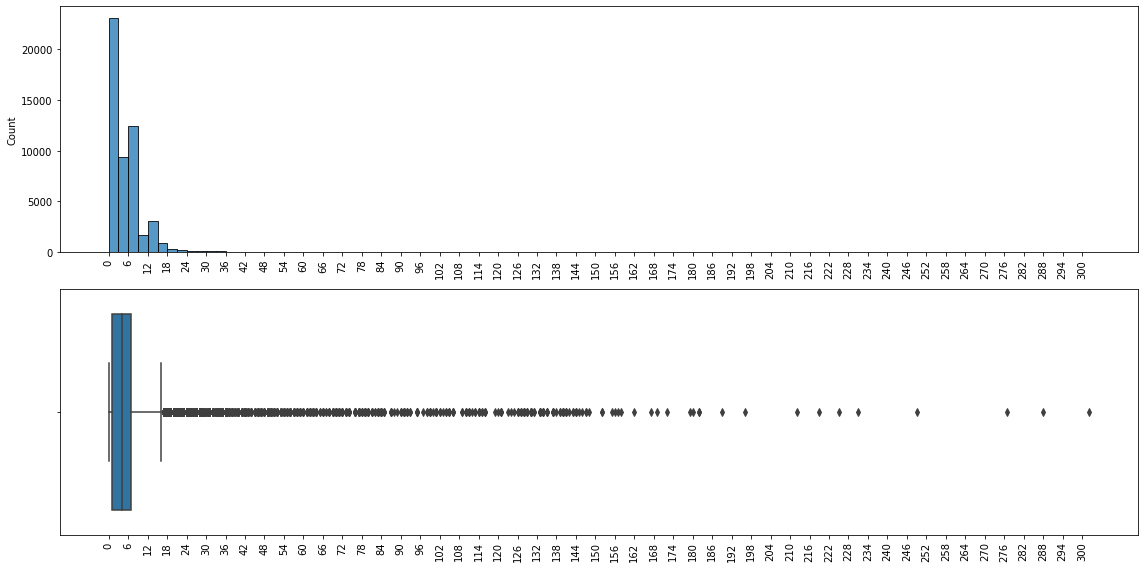

In [ ]:
x = (df_rcl['Dta_Concl_Cos'] - df_rcl['DTA_CMPT_ORIG_SSE'])

fig, ax = plt.subplots(nrows = 2, figsize=(16,8))

sns.histplot(x.dt.days, ax = ax[0], bins = 100)
sns.boxplot(x.dt.days, ax = ax[1])

x_ticks(0, max(x.dt.days), 6, ax[0], 10)
x_ticks(0, max(x.dt.days), 6, ax[1], 10)


ax[0].tick_params(axis = 'x', rotation = 90)
ax[1].tick_params(axis = 'x', rotation = 90)

fig.tight_layout();

### **3.3. Quantidade de Reclamações por Gerência Executiva**

Algo muito importante é verificar quais são as área responsáveis pelo maior número de reclamações, para isso será verificado a quantidade de reclamações por gerẽncia executiva e abaixo encontra-se o gráfico sobre.



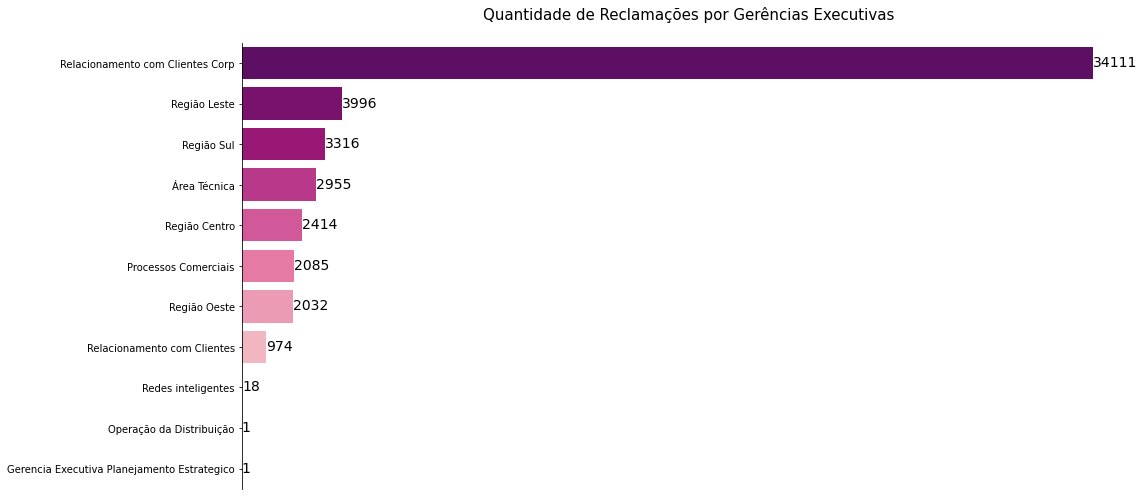

In [ ]:
fig, ax = plt.subplots(figsize = (16,7))

y = df_rcl['Gerencia Executiva2'].value_counts().index
x = df_rcl['Gerencia Executiva2'].value_counts().values

sns.barplot(x = x, y = y, ax = ax, palette = 'RdPu_r')

legenda_aux(x, np.arange(0, len(y), 1),
            x, 14, ax, 0.08, 0)

remocao_eixos(['right', 'top','bottom'], ax)
ax.tick_params(bottom = None, labelbottom = None)

ax.set_title('Quantidade de Reclamações por Gerências Executivas\n', fontdict = {'fontsize': 15})

fig.tight_layout();

O gráfico mostra que 34.111 mil reclamações são de responsabilidade da gerência de *Relacionamentos com Clientes Corp* isso representa 65% de todas as reclamações de clientes.

Deve ser realizada um consulta em relação aos Stakeholders e gerentes para entender porque essa área está com tantas reclamações, algumas perguntas possíveis:

* Porque a *Relacionamentos com Clientes Corp* tem tantas reclamações?
* A causa da reclamação é causado pela própria *Relacionamentos com Clientes Corp* ou por outra gerência que também está no processo, porém *Relacionamentos com Clientes Corp* acaba respondendo?

### **3.4. Gráfico de Pareto para Verificação dos Maiores tipos de Reclamações**

Agora chegou o momento de avaliar por um gráfico de pareto a quantidade de cada tipo de reclamação e também o seu percentual associado, sendo esse chamado gráfico de pareto.

O Principio de Pareto afirma que 80% dos efeitos vêem de 20% das causas, abaixo encontra-se o Gráfico de Pareto para verificarmos. 

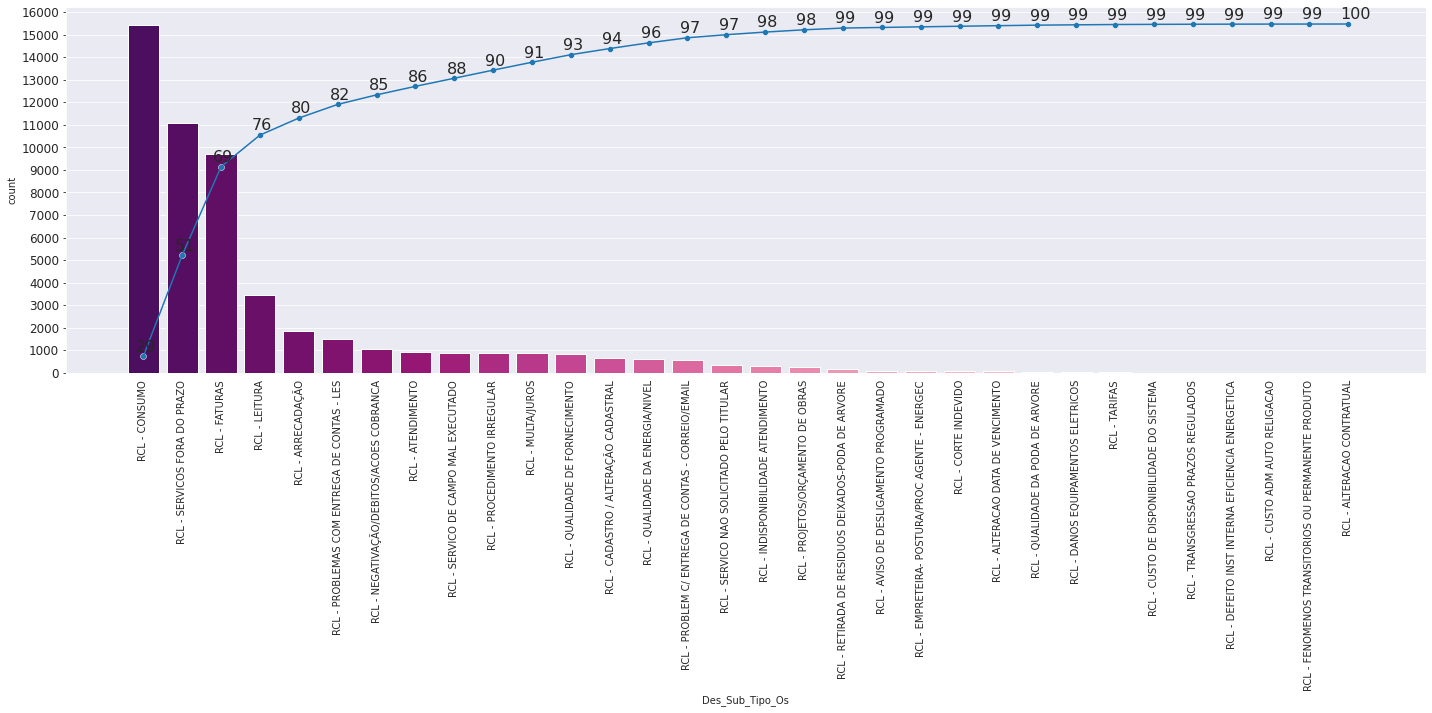

In [ ]:
qtd = df_rcl['Des_Sub_Tipo_Os'].value_counts().values
order = df_rcl['Des_Sub_Tipo_Os'].value_counts().index
aux_acm = 0
lista_pareto = []
x = []

for i in range(0, len(qtd), 1):
  x.append(i)
  if i == 0:
    aux_acm = qtd[i]
    lista_pareto.append( (aux_acm / qtd.sum())*100 )
  else: 
    aux_acm = aux_acm + qtd[i]
    lista_pareto.append( (aux_acm / qtd.sum())*100 )

order = df_rcl['Des_Sub_Tipo_Os'].value_counts().index
value = df_rcl['Des_Sub_Tipo_Os'].value_counts().values

sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize = (20,10))

#criando segundo eixo
ax2 = ax.twinx()

sns.countplot(x = df_rcl['Des_Sub_Tipo_Os'], palette = 'RdPu_r',order = order, ax = ax)
sns.lineplot(x = x, y = lista_pareto, ax = ax2)
sns.scatterplot(x = x, y = lista_pareto, ax = ax2)

ax.tick_params(axis = 'x', rotation = 90)

legenda_aux(x, lista_pareto, lista_pareto, 16, ax2, 1, -0.2)

y_ticks(0, max(value)+1000, 1000, 12, ax)

ax2.tick_params(right = None, labelright = None, grid_linewidth = 0)

fig.tight_layout()

Nota-se pelo pareto que 80% reclamações da concecionária de energia é causado por 5 tipos de reclamações, sendo essas 5:

* 1°) Reclamação por Consumo;
* 2°) Reclamação por Serviços Fora Prazo;
* 3°) Reclamação por Faturas;
* 4°) Reclamação por Leitura;
* 5°) Reclamação por Arrecadação.

Observa-se que dessas 5 reclamações, 3 requisitos estão relacionados a conta de energia que é a reclamação 1°, 2° e 3°. A Reclamação por Consumo e Faturas estão associadas diretamente ao valor pago pelo de energia consumido, já a reclamação de leitura também está associado a energia consumida, porém está mais relacionada com um erro de leitura humano causado pelo leiturista que emite o valor da conta que deve ser pago.

### **3.5. Quais gerências são responsáveis pela reclamação de maior frequência.**

Agora que sabe-se que a Reclamação por Consumo é a mais feita pelos clientes, pode-se verificar quais as área responsáveis pela reclamação. 

Olhando abaixo é possível ver que todas as *15.431 Reclamações por Consumo* são de responsabilidade de _Relacionamento com Clientes Corp_, dessa forma deve ser proposto uma avaliação dessa gerência, a causa raiz desse reclamação e caso esteja realmente seja causado pelo área ser estudado oportunidades de melhoria.

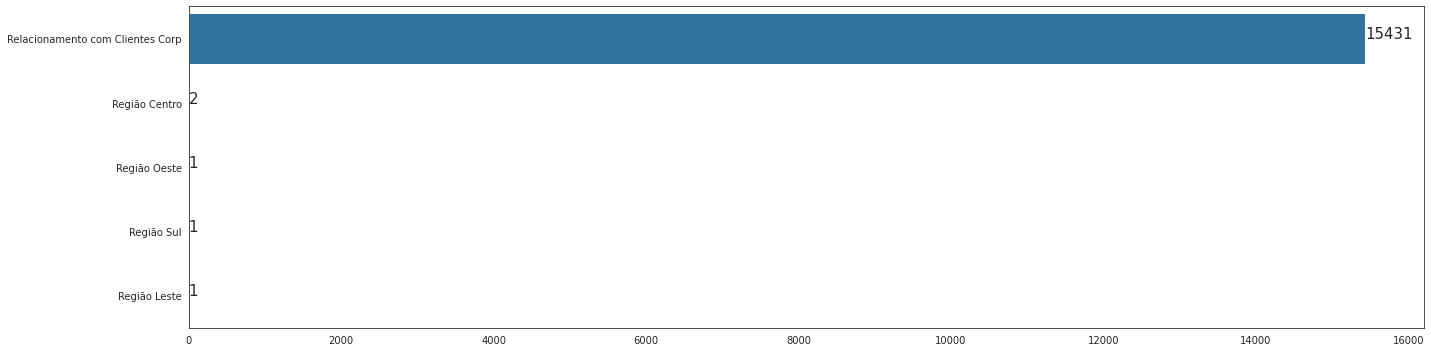

In [ ]:
x = df_rcl[df_rcl['Des_Sub_Tipo_Os'] == 'RCL - CONSUMO']['Gerencia Executiva2'].value_counts().values
y = df_rcl[df_rcl['Des_Sub_Tipo_Os'] == 'RCL - CONSUMO']['Gerencia Executiva2'].value_counts().index

sns.set_style('white')

fig, ax = plt.subplots(figsize = (20,5))

sns.barplot(x = x, y = y, ax = ax)

legenda_aux(x, np.arange(0, len(y), 1), x, 15, ax, 0, 0)

fig.tight_layout();


## **4. Conclusão**

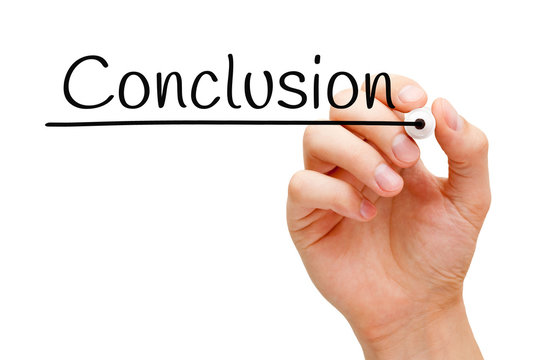

Pode-se concluir que há algumas falhas no que se diz a *Foco no Cliente* quando vemos as reclamações. Um número de 51 mil reclamações em um período de 11 meses é uma quantidade significativa de descontentamento por parte do cliente.

Nota-se que dessas 51 mil, 80% são causas por reclamações de Consumo, Serviços Fora Prazo, Faturas, Leitura e Arrecadação. Três dessas reclamações estão muito correlaciondas com a conta de energia Consumo, Fatura e Leitura. Essas reclamações, principalmente as *Reclamações por Consumo*, estão totalmente relacionada com a gerência de *Relacionamento com Clientes Corp*.

Portanto, conluí-se que deve-se realizado um estudo mais aprofundando em relação a gerência de Relacionamento com Clientes Corp* e verificar as causas raízes da reclamação de Consumo, Faturas, Leitura. Qual quantidade dessas reclamações realmente são procedentes? E se são procedentes qual é o erro que está sendo cometido para que o cliente fica descontente com o serviço prestado.

Além disso, a segunda maior reclamação é causada por Serviços Fora Prazo, isso mostra uma falta de comprometimento com o atendimento do cliente quando solicita um serviço, essas reclamações devem ser investigadas para encontrar as causas raízes.


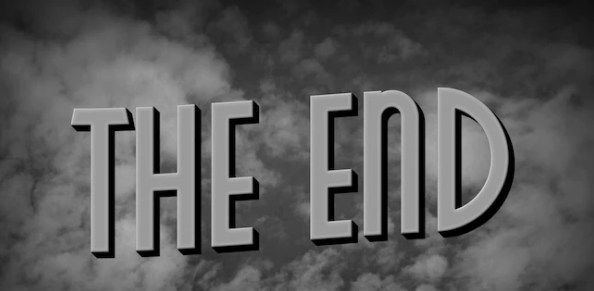